Modelación y Simulación
- MiniProyecto 6 - Simulacion de montecarlo

1. Andres Q 
2. Mirka M
3. Oscar de Leon

In [223]:
#import de la funcion random
import random
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

###Ejercicio 1

In [224]:
# Generates uniform random number between 4 and 6
random.uniform(4, 6)

4.188640109115713

Como sabemos que los chances para que una moneda sea cara o escudo son iguales, procedemos a simularlo

In [225]:
def unbiased_coin_toss():
    # Generate a random number from 0 to 1
    x = random.uniform(0, 1)
    # Probability that the number falls between 0 and 0.5 is 1/2
    if x > 0.5:
        # Heads for True
        return True
    else:
        # Tails for False
        return False

In [226]:
# SIMULACION DE MONTECARLO
from traceback import print_tb


prob = []
# With numpy we fill a list with 1000 numbers between 0 and 1000 in order
iterations = np.arange(1, 1001)
# Make 1000 experiments
for i in range(1000):
    # Each experiment have 10 coin tosses
    N = 10
    results = []
    # Toss the coin 10 times and store that in a list
    for i in range(N):
        result = unbiased_coin_toss()
        results.append(result)
    n_heads = sum(results)
    p_heads = n_heads/N
    prob.append(p_heads)
# average the probability of heads over 1000 experiments
p_heads_MC = sum(prob)/1000
print("Probability is {:.3f}".format(p_heads_MC))


Probability is 0.492


Como podemos apreciar, la probabilidad varia aunque regularmente esta alrededor de 0.5 (debido a las monedas justas)

In [227]:
# SIMULACION DE MONTECARLO
# Este graficoc es para ver la distribucion de la probabilidad conforme a la iteracion
# Es un grafico de dinamico
fig = px.line(x=iterations, y=prob, title='Simulacion de Montecarlo', labels={'x':'Iteraciones', 'y':'Probabilidad'})
fig.show()

###Ejercicio 2

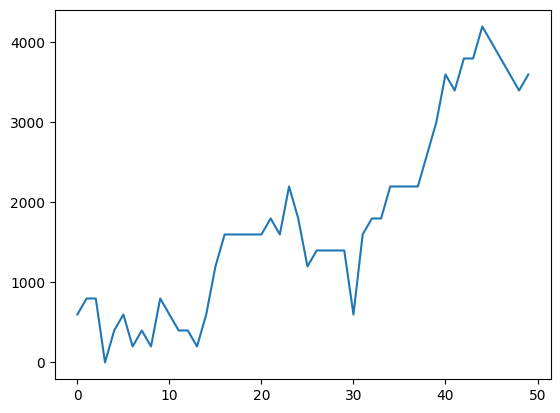

In [228]:
import random 
import matplotlib.pyplot as plt


iter = 10
final = []
cantidad = 50
acumulado = 0
apostado = 100

for i in range(cantidad):
    for j in range(iter):
        token = random.randint(1, 100)
        numero = random.randint(0, 1)
        if(numero == 0):
            if((token %2 == 0 or token == 11 and token != 10)):
                acumulado += apostado
            else:
                acumulado -= apostado
        if(numero == 1):
            if((token %2 != 1 or token != 11 and token == 10)):
                acumulado += apostado
            else:
                acumulado -= apostado
    final.append(acumulado)

plt.plot(list(range(cantidad)) ,final)
plt.show()

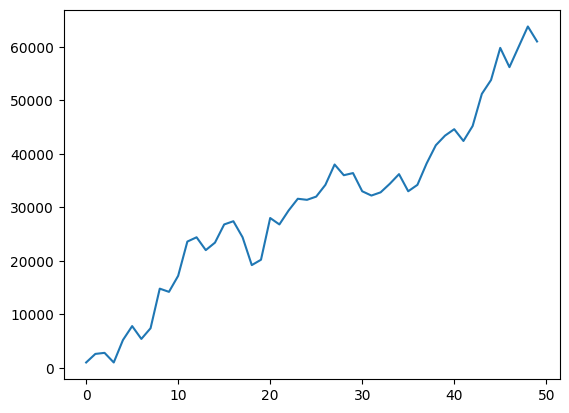

In [229]:
iter = 1000
final = []
cantidad = 50
acumulado = 0
apostado = 100

for i in range(cantidad):
    for j in range(iter):
        token = random.randint(1, 100)
        numero = random.randint(0, 1)
        if(numero == 0):
            if((token %2 == 0 or token == 11 and token != 10)):
                acumulado += apostado
            else:
                acumulado -= apostado
        elif(numero == 1):
            if((token %2 != 1 or token != 11 and token == 10)):
                acumulado += apostado
            else:
                acumulado -= apostado
    final.append(acumulado)
    
plt.plot(list(range(cantidad)) ,final)
plt.show()


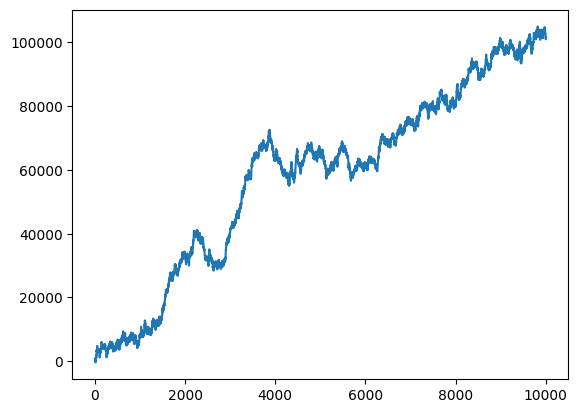

In [230]:
iter = 10
final = []
cantidad = 10000
acumulado = 0
apostado = 100

for i in range(cantidad):
    for j in range(iter):
        token = random.randint(1, 100)
        numero = random.randint(0, 1)
        if(numero == 0):
            if((token %2 == 0 or token == 11 and token != 10)):
                acumulado += apostado
            else:
                acumulado -= apostado
        elif(numero == 1):
            if((token %2 != 1 or token != 11 and token == 10)):
                acumulado += apostado
            else:
                acumulado -= apostado
    final.append(acumulado)
    
plt.plot(list(range(cantidad)) ,final)
plt.show()


###Ejercicio 3

In [231]:
#grafo
grafo = {'H1': [('H2',5), ('H4',6),('H6',4),('H8',7)],
            'H2': [('H1',5), ('H3',2),('H4',4),('H5',3)],
            'H3': [('H2',2),('H4',1)],
            'H4': [('H1',6),('H2',2),('H3',1),('H5',7)],
            'H5': [('H2',3),('H4',7),('H7',6),('H8',4)],
            'H6': [('H1',4),('H7',3)],
            'H7': [('H5',6),('H6',3),('H8',2)],
            'H8': [('H1',7),('H5',4),('H7',2)],
        }

In [232]:
def get_next_node(grafo,current_node):
    weights = [edge[1] for edge in grafo[current_node]]

    #total de los pesos
    sum_w = sum(weights)

    # probabilidad original de los pesos
    weights = [((edge*100)/sum_w)/100 for edge in weights]

    #invertir la probabilidad
    new_weights = [1-edge for edge in weights]

    #sumar los nuevos pesos
    sum_w = sum(new_weights)
    new_weights = [((edge*1)/sum_w) for edge in new_weights]

    #print(new_peso)
    return random.choices(population=grafo[current_node],weights=new_weights)[0]

In [233]:
def MCMC2(start,end,graph):
    queue = [start]
    new_path = [start]
    total_weight = 0

    while queue:
        path = queue.pop(0)
        node = path
        #print('path ',path)
        if node  in new_path:
            #siguiente nodo
            new_node,weight = get_next_node(graph,node)
            #condiciones coinciden y encontraron un camino
            if new_node == end and len(new_path) == len(graph):
                total_weight+=weight
                new_path.append(new_node)
                return True,new_path,total_weight
            #el nuevo nodo es igual al nodo final pero no hemos visitado todos los nodos
            elif new_node == end and len(new_path) < len(graph):
                #loop
                queue.append(node)
            #si el nuevo nodo está en la nueva ruta 
            elif new_node in new_path:
                pass
            else:
                total_weight+=weight
                new_path.append(new_node)
                queue.append(new_node)
    #print("No existe una ruta de conexión :(")
    return False,new_path,total_weight

In [234]:
def tsp_mcmc_simulation(start,end,graph,simulation_nums = 10000):
    min_cost = 99999
    min_path= []
    for game in range(simulation_nums):
        #costs,paths = [],[]
        done,path,cost = MCMC2(start,end,graph)
        if done is True:
            if cost < min_cost:
                min_cost,min_path = cost,path
    print('The shortest path is: ',*min_path)
    print('The min cost is: ',min_cost)

In [235]:
tsp_mcmc_simulation('H1','H1',grafo)

The shortest path is:  H1 H4 H3 H2 H5 H8 H7 H6 H1
The min cost is:  25
